In [14]:
from glob import glob
import pandas as pd
import os
import numpy as np
from scipy.stats import shapiro
from scipy.stats import levene
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from typing import List
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from scipy.interpolate import griddata
from itertools import combinations
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [15]:
list_folders = glob("./results/*/", recursive = True)
list_folders = sorted(list_folders, key = lambda word: word.split('_')[0].split('/')[2])

In [16]:
df = pd.DataFrame(columns=['Hidden Layers', 'Units', 'MAE', 'MSE', 'RMSE', 'R2', 'Training Time (min)', 'Inference Time (sec)'])

for folder in list_folders:
    list_files = sorted(glob(f'{os. getcwd()}{str(folder[1:])}*.csv', recursive = True), key = lambda word: int(word.split('_')[-2]))
    
    n_hidden_layers = folder.split('_')[0].split('/')[2]
    for file in list_files:
        n_units = file.split('_')[3]
        csv_file = pd.read_csv(file, index_col='fold')
        #print(csv_file)
        n = 2
        #print(str(round(csv_file.loc['mean']['mae'],n)) + u" \u00B1 " + str(round(csv_file.loc['std']['mae'],n)))
        #df.loc[len(df.index)] = [0,1,2,3,4]
        repeated_string = (n_units + ',')*int(n_hidden_layers)
        case = f"({repeated_string[:-1]})"
        df.loc[len(df.index)] = [ n_hidden_layers,
                                               n_units,
                                               str(round(csv_file.loc['mean']['mae'],n)) + u" \u00B1 " + str(round(csv_file.loc['std']['mae'],n)),
                                               str(round(csv_file.loc['mean']['mse'],n)) + u" \u00B1 " + str(round(csv_file.loc['std']['mse'],n)),
                                               str(round(csv_file.loc['mean']['rmse'],n)) + u" \u00B1 " + str(round(csv_file.loc['std']['rmse'],n)),
                                               str(round(csv_file.loc['mean']['r2']*100,n)) + u" \u00B1 " + str(round(csv_file.loc['std']['r2']*100,n)),
                                               str(round(csv_file.loc['mean']['training_time']/60,n)) + u" \u00B1 " + str(round(csv_file.loc['std']['training_time']/60,n)),
                                               str(round(csv_file.loc['mean']['inference_time'],n)) + u" \u00B1 " + str(round(csv_file.loc['std']['inference_time'],n))]
df

,Hidden Layers,Units,MAE,MSE,RMSE,R2,Training Time (min),Inference Time (sec)
0,1,16,4.68 ± 0.24,129.54 ± 5.41,11.38 ± 0.24,85.98 ± 0.59,90.28 ± 27.03,4.84 ± 0.3
1,1,32,4.83 ± 0.51,119.5 ± 5.39,10.93 ± 0.25,87.07 ± 0.58,77.17 ± 35.19,5.01 ± 0.18
2,1,64,4.6 ± 0.38,113.2 ± 7.67,10.63 ± 0.36,87.75 ± 0.83,104.52 ± 16.31,5.23 ± 0.23
3,1,128,4.76 ± 0.71,104.17 ± 7.2,10.2 ± 0.36,88.73 ± 0.78,135.81 ± 25.44,5.38 ± 0.27
4,1,256,4.37 ± 0.09,92.57 ± 3.68,9.62 ± 0.19,89.98 ± 0.4,108.19 ± 15.01,5.37 ± 0.31
5,10,16,3.03 ± 0.26,81.68 ± 8.04,9.03 ± 0.44,91.16 ± 0.87,40.28 ± 20.68,6.21 ± 0.44
6,10,32,3.0 ± 0.45,80.53 ± 16.06,8.94 ± 0.93,91.28 ± 1.74,61.42 ± 22.45,6.4 ± 0.26
7,10,64,3.04 ± 0.49,86.19 ± 29.34,9.18 ± 1.51,90.67 ± 3.18,60.89 ± 16.36,7.68 ± 0.65
8,10,128,3.46 ± 0.81,96.53 ± 28.79,9.73 ± 1.5,89.55 ± 3.12,86.99 ± 18.63,11.97 ± 1.95
9,10,256,2.75 ± 0.4,65.85 ± 6.52,8.11 ± 0.41,92.87 ± 0.71,171.56 ± 81.49,28.19 ± 0.55


In [17]:
# Separating the means and standard deviations for MAE, MSE, RMSE, Training Time, and Inference Time
metrics = ['MAE', 'MSE', 'RMSE', 'R2', 'Training Time (min)', 'Inference Time (sec)']

for metric in metrics:
    df[[f'{metric}_mean', f'{metric}_std']] = df[metric].str.split(' ± ', expand=True)
    df[f'{metric}_mean'] = df[f'{metric}_mean'].astype(float)
    df[f'{metric}_std'] = df[f'{metric}_std'].astype(float)

# Creating a new dataframe with only the means for analysis
mean_df = df.groupby(['Hidden Layers', 'Units'])[[f'{metric}_mean' for metric in metrics]].mean().reset_index().astype(float)

# Displaying the dataframe with the means
mean_df

,Hidden Layers,Units,MAE_mean,MSE_mean,RMSE_mean,R2_mean,Training Time (min)_mean,Inference Time (sec)_mean
0,1.0,128.0,4.76,104.17,10.20,88.73,135.81,5.38
1,1.0,16.0,4.68,129.54,11.38,85.98,90.28,4.84
2,1.0,256.0,4.37,92.57,9.62,89.98,108.19,5.37
3,1.0,32.0,4.83,119.50,10.93,87.07,77.17,5.01
4,1.0,64.0,4.60,113.20,10.63,87.75,104.52,5.23
5,10.0,128.0,3.46,96.53,9.73,89.55,86.99,11.97
6,10.0,16.0,3.03,81.68,9.03,91.16,40.28,6.21
7,10.0,256.0,2.75,65.85,8.11,92.87,171.56,28.19
8,10.0,32.0,3.00,80.53,8.94,91.28,61.42,6.40
9,10.0,64.0,3.04,86.19,9.18,90.67,60.89,7.68


In [23]:
# Print the row with the highest value of R2_mean
df[df['R2_mean'] == df['R2_mean'].max()]


,Hidden Layers,Units,MAE,MSE,RMSE,R2,Training Time (min),Inference Time (sec),MAE_mean,MAE_std,MSE_mean,MSE_std,RMSE_mean,RMSE_std,R2_mean,R2_std,Training Time (min)_mean,Training Time (min)_std,Inference Time (sec)_mean,Inference Time (sec)_std
18,3,128,2.33 ± 0.07,51.9 ± 3.02,7.2 ± 0.21,94.38 ± 0.33,78.7 ± 32.03,6.65 ± 0.66,2.33,0.07,51.9,3.02,7.2,0.21,94.38,0.33,78.7,32.03,6.65,0.66


# Plots

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


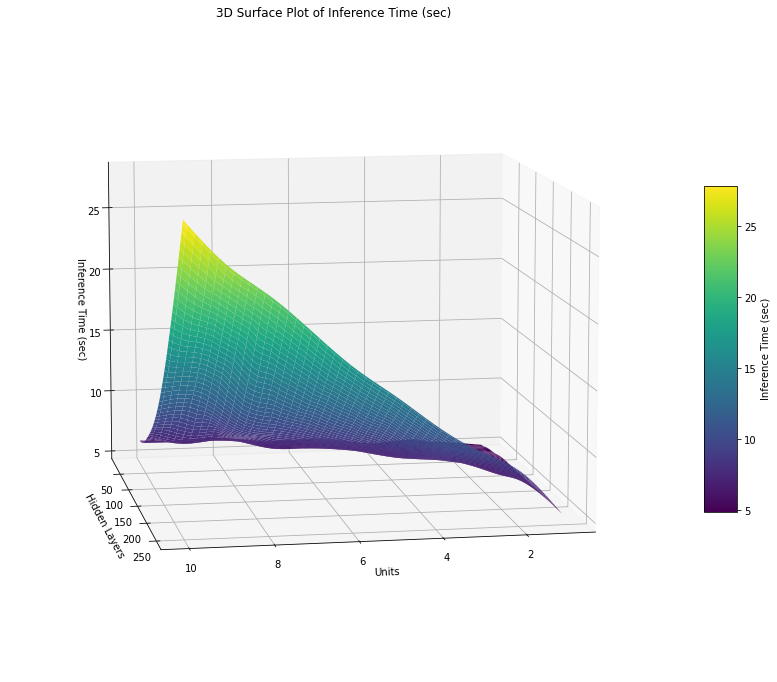

In [136]:
create_3d_surface_plot(df=mean_df, y_col='Units', x_col='Hidden Layers', z_col='Inference_Time_mean', 
                       title='3D Surface Plot of Inference Time (sec)', xlabel='Units', ylabel='Hidden Layers', 
                       zlabel='Inference Time (sec)', cmap=cm.viridis,elev=10,azim=80)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


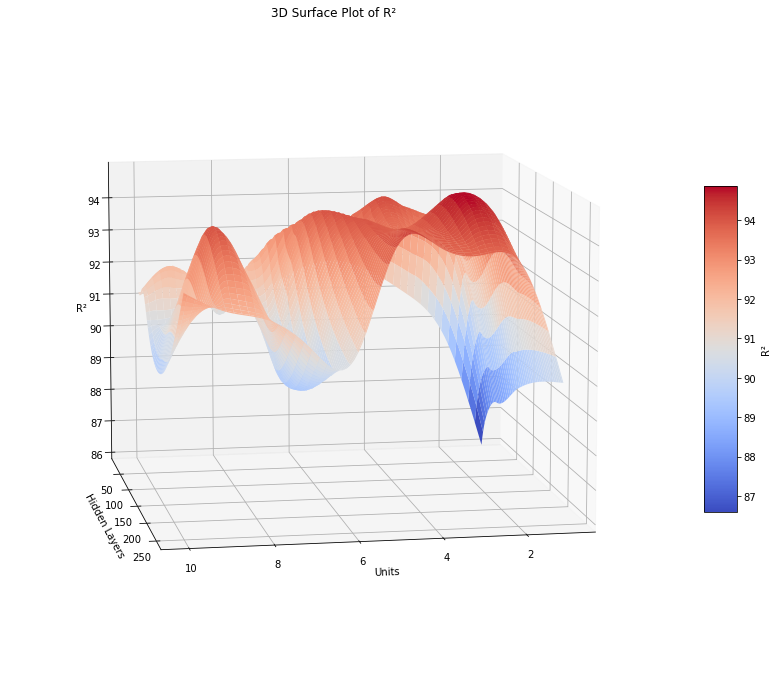

In [137]:
create_3d_surface_plot(df=mean_df, y_col='Units', x_col='Hidden Layers', z_col='R2_mean', 
                       title='3D Surface Plot of R²', xlabel='Units', ylabel='Hidden Layers', 
                       zlabel='R²', cmap=cm.coolwarm, elev=10,azim=80)


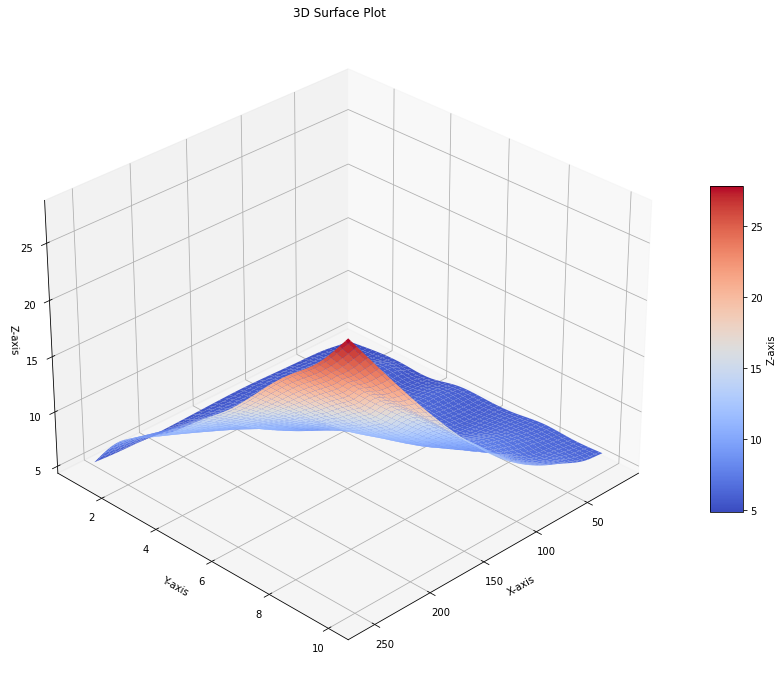

In [76]:
create_3d_surface_plot(mean_df, "Units", "Hidden Layers", , "Inference_Time_mean")

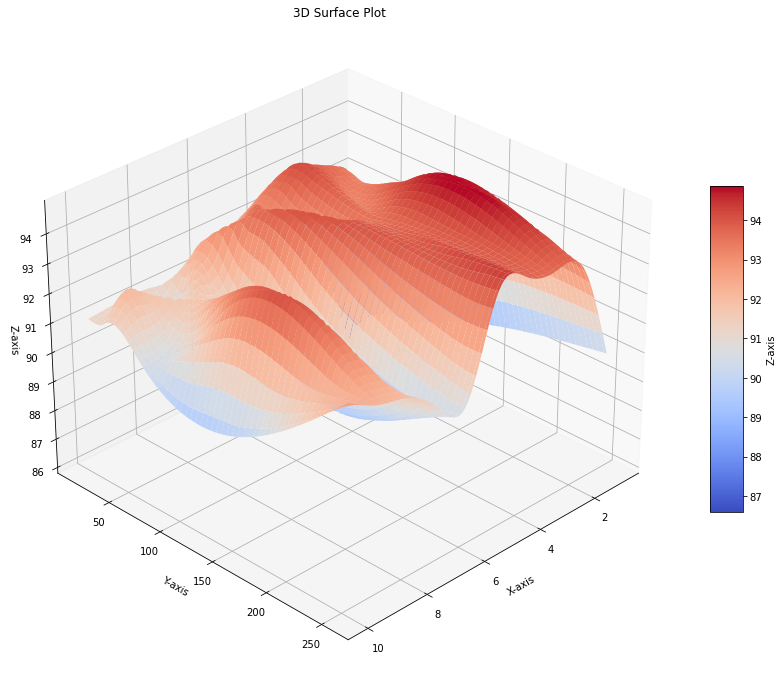

In [74]:
create_3d_surface_plot(mean_df,  "Hidden Layers", "Units" , "R2_mean")

In [ ]:
create_dual_3d_surface_plot(df=mean_df, 
                            x_col='Units', 
                            y_col='Hidden Layers', 
                            z_col1='R2_mean', 
                            z_col2='Inference_Time_mean', 
                            title='R² and Inference Time for Different Neural Network Configurations', 
                            xlabel='Units', 
                            ylabel='Hidden Layers', 
                            zlabel1='R² Mean', 
                            zlabel2='Inference Time Mean (ms)', 
                            cmap1=cm.coolwarm, 
                            cmap2=cm.viridis, 
                            figsize=(16, 12), 
                            elev=30, 
                            azim=45)


In [138]:
def create_3d_surface_plot(df, x_col, y_col, z_col, title='3D Surface Plot', 
                        xlabel='X-axis', ylabel='Y-axis', zlabel='Z-axis', 
                        cmap=cm.coolwarm, figsize=(16, 12), elev=30, azim=45):
    """
    Create a 3D surface plot from three columns in a DataFrame.

    Args:
        df (DataFrame): DataFrame containing the data.
        x_col (str): Name of the column in df for the x-axis.
        y_col (str): Name of the column in df for the y-axis.
        z_col (str): Name of the column in df for the z-axis (surface height).
        title (str, optional): Title of the plot. Defaults to '3D Surface Plot'.
        xlabel (str, optional): Label for the x-axis. Defaults to 'X-axis'.
        ylabel (str, optional): Label for the y-axis. Defaults to 'Y-axis'.
        zlabel (str, optional): Label for the z-axis. Defaults to 'Z-axis'.
        cmap (Colormap, optional): Colormap for the surface plot. Defaults to cm.coolwarm.
        figsize (tuple, optional): Size of the figure. Defaults to (16, 12).
        elev (int, optional): Elevation angle in the z plane for the 3D plot. Defaults to 30.
        azim (int, optional): Azimuth angle in the x,y plane for the 3D plot. Defaults to 45.

    Returns:
        None: The function creates a matplotlib 3D surface plot and does not return any value.
    """
    # Data for the plot
    x = df[x_col]
    y = df[y_col]
    z = df[z_col]

    # Creating grid data for the surface plot
    xi = np.linspace(x.min(), x.max(), 100)
    yi = np.linspace(y.min(), y.max(), 100)
    xi, yi = np.meshgrid(xi, yi)
    zi = griddata((x, y), z, (xi, yi), method='cubic')

    # Plotting the surface
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(xi, yi, zi, cmap=cmap, linewidth=0, antialiased=True)

    # Setting labels and title
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_zlabel(zlabel, labelpad=1)
    plt.title(title)

    # Enhancing the view
    ax.view_init(elev=elev, azim=azim)

    # Adding a color bar
    cbar = fig.colorbar(surf, shrink=0.5, aspect=10)
    cbar.set_label(zlabel)

    plt.savefig('plot.eps', format='eps')
    plt.savefig('plot.png', format='png')




In [39]:
pivot_R2

Units,128,16,256,32,64
Hidden Layers,,,,,
1,88.73,85.98,89.98,87.07,87.75
10,89.55,91.16,92.87,91.28,90.67
2,93.71,89.47,93.36,91.74,92.56
3,94.38,90.86,93.70,92.96,93.42
4,93.64,91.63,93.97,93.50,94.00
5,94.00,91.99,94.00,92.97,93.02
6,92.67,91.66,90.84,92.48,93.68
7,89.85,91.09,91.16,92.27,91.41
8,92.59,91.24,92.02,90.62,91.75


In [40]:
# Data preprocessing to extract mean values of R2 and inference time
# Since the values are in a string format with '±', we'll split the string and take the first part as the mean value

data['R2_mean'] = data['R2'].apply(lambda x: float(x.split(' ± ')[0]))
data['Inference_Time_mean'] = data['Inference Time (sec)'].apply(lambda x: float(x.split(' ± ')[0]))

# Preparing data for surface plot
# Since the direct relationship between hidden layers, units and the metrics might not be straightforward
# due to possible non-linearities and interactions, we'll pivot the table to create a grid for plotting.

# R2 score plot data preparation
pivot_R2 = data.pivot("Hidden Layers", "Units", "R2_mean")

# Inference time plot data preparation
pivot_inference_time = data.pivot("Hidden Layers", "Units", "Inference_Time_mean")

In [78]:
from scipy.stats import shapiro, levene
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from scipy.interpolate import griddata
from itertools import combinations

def create_dual_3d_surface_plot(df, x_col, y_col, z_col1, z_col2, title='Dual 3D Surface Plot', 
                               xlabel='X-axis', ylabel='Y-axis', zlabel1='Z-axis 1', zlabel2='Z-axis 2', 
                               cmap1=cm.coolwarm, cmap2=cm.viridis, figsize=(16, 12), elev=30, azim=45):
    """
    Create a figure with two 3D surface plots from three columns in a DataFrame, representing two different 'z' values.

    Args:
        df (DataFrame): DataFrame containing the data.
        x_col (str): Name of the column in df for the x-axis.
        y_col (str): Name of the column in df for the y-axis.
        z_col1 (str): Name of the first column in df for the z-axis (surface height).
        z_col2 (str): Name of the second column in df for the z-axis (surface height).
        title (str, optional): Title of the plot. Defaults to 'Dual 3D Surface Plot'.
        xlabel, ylabel, zlabel1, zlabel2 (str, optional): Labels for the axes.
        cmap1, cmap2 (Colormap, optional): Colormaps for the surface plots.
        figsize (tuple, optional): Size of the figure.
        elev, azim (int, optional): Elevation and azimuth angles for the 3D plots.

    Returns:
        None: This function creates a matplotlib 3D surface plot and does not return any value.
    """
    # Data for the plots
    x = df[x_col]
    y = df[y_col]
    z1 = df[z_col1]
    z2 = df[z_col2]

    # Creating grid data for the surface plots
    xi = np.linspace(x.min(), x.max(), 100)
    yi = np.linspace(y.min(), y.max(), 100)
    xi, yi = np.meshgrid(xi, yi)
    zi1 = griddata((x, y), z1, (xi, yi), method='cubic')
    zi2 = griddata((x, y), z2, (xi, yi), method='cubic')

    # Plotting the surfaces
    fig = plt.figure(figsize=figsize)

    # First plot
    ax1 = fig.add_subplot(121, projection='3d')
    surf1 = ax1.plot_surface(xi, yi, zi1, cmap=cmap1, linewidth=0, antialiased=True)
    ax1.set_xlabel(xlabel)
    ax1.set_ylabel(ylabel)
    ax1.set_zlabel(zlabel1, labelpad=1)
    ax1.view_init(elev=elev, azim=azim)
    cbar1 = fig.colorbar(surf1, shrink=0.5, aspect=10, pad=0.1)
    cbar1.set_label(zlabel1)

    # Second plot
    ax2 = fig.add_subplot(122, projection='3d')
    surf2 = ax2.plot_surface(xi, yi, zi2, cmap=cmap2, linewidth=0, antialiased=True)
    ax2.set_xlabel(xlabel)
    ax2.set_ylabel(ylabel)
    ax2.set_zlabel(zlabel2, labelpad=1)
    ax2.view_init(elev=elev, azim=azim)
    cbar2 = fig.colorbar(surf2, shrink=0.5, aspect=10, pad=0.1)
    cbar2.set_label(zlabel2)

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()


In [83]:
mean_df.columns

Index(['Hidden Layers', 'Units', 'R2_mean', 'Inference_Time_mean'], dtype='object')

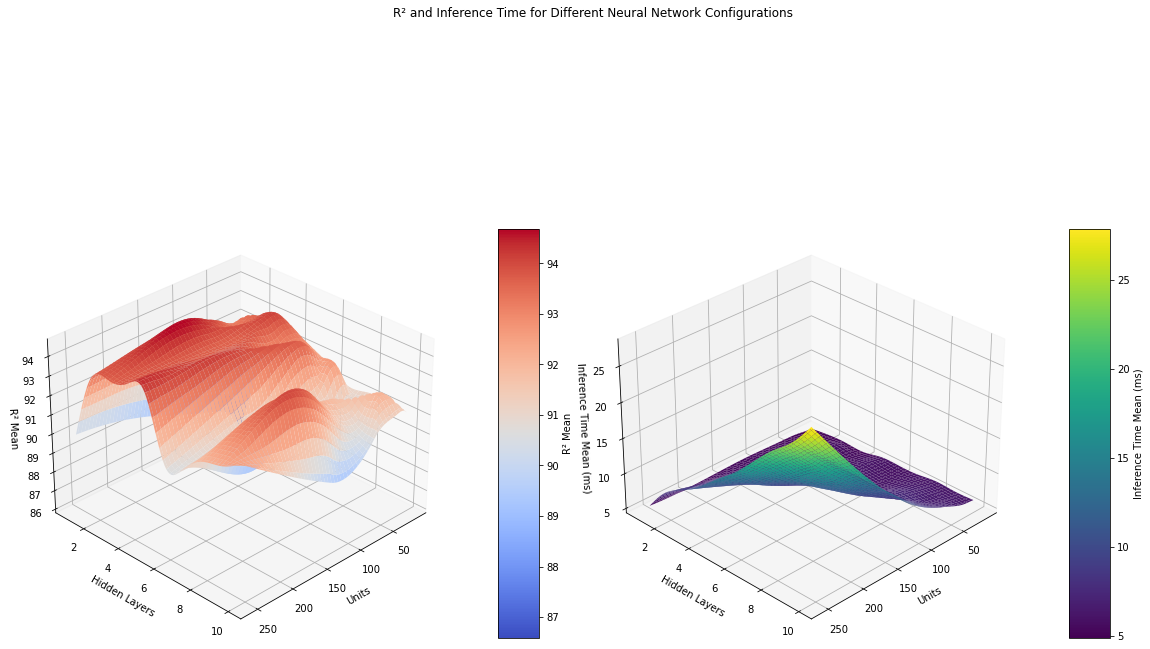

In [84]:
create_dual_3d_surface_plot(df=mean_df, 
                            x_col='Units', 
                            y_col='Hidden Layers', 
                            z_col1='R2_mean', 
                            z_col2='Inference_Time_mean', 
                            title='R² and Inference Time for Different Neural Network Configurations', 
                            xlabel='Units', 
                            ylabel='Hidden Layers', 
                            zlabel1='R² Mean', 
                            zlabel2='Inference Time Mean (ms)', 
                            cmap1=cm.coolwarm, 
                            cmap2=cm.viridis, 
                            figsize=(16, 12), 
                            elev=30, 
                            azim=45)
